# Lezione 11bis - Bootcamp - Analisi dei dati


**CONTESTO:** *Fatal Police Shooting in the US*

L’omicidio del 2014 di Michael Brown a Ferguson, Missouri, ha dato origine a una protesta culminata nel movimento Black Lives Matter e al crescente interesse dell’opinione pubblica sull’affidabilità e il razzismo delle forze di polizia negli Stati Uniti.

Il Washington Post compila, da gennaio 2015, un database di tutti i casi di omicidio (da arma da fuoco) da parte della polizia negli Stati Uniti. A questo link (https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us) trovi un dataset pubblico di Kaggle che riporta, oltre a quello del Post, altri quattro database di informazioni demografiche. Il dataset di Kaggle si riferisce al periodo 2015-2016: a questo link (https://github.com/washingtonpost/data-police-shootings) trovi il database del Post aggiornato.

Infine, ecco un database (https://drive.google.com/file/d/1kEikaWCZYVO3ygVvAuVqxYqQPaVJrdYb/view) con la popolazione delle città USA.

**OBIETTIVO:** Analizzerai i dati inerenti ai casi di omicidio (da arma da fuoco) da parte della polizia negli Stati Uniti con lo scopo di evidenziare possibili bias razziali da parte della polizia.

A partire dai dati forniti ti sembra che la polizia americana uccida spoporzionatamente persone appartenenti ad un dato gruppo
prensente nella colonna 'race'?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
shot=pd.read_csv('fatal-police-shootings-data.csv')

In [3]:
shot.head(10)

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473
5,11,2015-01-04,attack,not,gun,Guthrie,Logan,OK,35.876991,-97.423454,not_available,Kenneth Joe Brown,18.0,male,W,not_available,False,False,101
6,13,2015-01-05,shoot,car,gun,Chandler,Maricopa,AZ,33.327887,-111.840959,not_available,Kenneth Arnold Buck,22.0,male,H,not_available,False,False,195
7,15,2015-01-06,point,not,gun,Assaria,Saline,KS,38.703755,-97.563904,not_available,Brock Nichols,35.0,male,W,not_available,False,False,490
8,16,2015-01-06,accident,not,unarmed,Burlington,Des Moines,IA,40.809250,-91.118875,not_available,Autumn Steele,34.0,female,W,not_available,False,True,287
9,17,2015-01-06,point,not,replica,Knoxville,Allegheny,PA,40.412936,-79.991408,not_available,Leslie Sapp III,47.0,male,B,not_available,False,False,26254


In [4]:
shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8775 entries, 0 to 8774
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          8775 non-null   int64  
 1   date                        8775 non-null   object 
 2   threat_type                 8727 non-null   object 
 3   flee_status                 7583 non-null   object 
 4   armed_with                  8565 non-null   object 
 5   city                        8717 non-null   object 
 6   county                      3919 non-null   object 
 7   state                       8775 non-null   object 
 8   latitude                    7785 non-null   float64
 9   longitude                   7785 non-null   float64
 10  location_precision          7785 non-null   object 
 11  name                        8193 non-null   object 
 12  age                         8171 non-null   float64
 13  gender                      8727 

In [5]:
#converto object in datatime e interi
shot.age=shot.age.convert_dtypes(convert_integer=True)
shot.date=pd.to_datetime(shot.date)
shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8775 entries, 0 to 8774
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          8775 non-null   int64         
 1   date                        8775 non-null   datetime64[ns]
 2   threat_type                 8727 non-null   object        
 3   flee_status                 7583 non-null   object        
 4   armed_with                  8565 non-null   object        
 5   city                        8717 non-null   object        
 6   county                      3919 non-null   object        
 7   state                       8775 non-null   object        
 8   latitude                    7785 non-null   float64       
 9   longitude                   7785 non-null   float64       
 10  location_precision          7785 non-null   object        
 11  name                        8193 non-null   object      

In [50]:
x=pd.read_csv('ShareRaceByCity.csv',encoding="ISO-8859-1")
x=x.rename(columns=str.lower)
x.columns= [x.replace(" ", "_") for x in x.columns]
x.columns= [x.replace("geographic_area", "state") for x in x.columns]
x.head(10)

,state,city,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
5,AL,Alabaster city,79.4,13.5,0.4,0.9,9
6,AL,Albertville city,75.9,1.9,0.8,0.5,27.9
7,AL,Alexander City city,62.2,32,0.2,0.9,4.8
8,AL,Alexandria CDP,87.4,10.2,0.3,0.5,0.9
9,AL,Aliceville city,22.6,74.9,0.1,0,1.2


In [51]:
#file popolazione
x['city'] = [x.replace(" city and borough", "") for x in x.city]
x['city'] = [x.replace(" city", "") for x in x.city]
x['city'] = [x.replace(" town", "") for x in x.city]
x['city'] = [x.replace(" village", "") for x in x.city]
x['city'] = [x.replace(" CDP", "") for x in x.city]
x['city'] = [x.replace(" borough", "") for x in x.city]
x['city'] = [x.replace(" unified government", "") for x in x.city]
x['city'] = [x.replace(" consolidated government", "") for x in x.city]
x.head(10)



,state,city,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda,67.2,30.2,0,0,1.6
1,AL,Abbeville,54.4,41.4,0.1,1,3.1
2,AL,Adamsville,52.3,44.9,0.5,0.3,2.3
3,AL,Addison,99.1,0.1,0,0.1,0.4
4,AL,Akron,13.2,86.5,0,0,0.3
5,AL,Alabaster,79.4,13.5,0.4,0.9,9
6,AL,Albertville,75.9,1.9,0.8,0.5,27.9
7,AL,Alexander City,62.2,32,0.2,0.9,4.8
8,AL,Alexandria,87.4,10.2,0.3,0.5,0.9
9,AL,Aliceville,22.6,74.9,0.1,0,1.2


In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   state                  29268 non-null  object
 1   city                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [53]:
#trasformo object in float
for i in (x.columns[2:7]):
    x[i]=pd.to_numeric(x[i],errors='coerce')

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  29268 non-null  object 
 1   city                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


Facciamo il pd.merge tra il dataframe shot iniziale e il dataframe con la percentuale delle popolazioni

In [55]:
union=shot.merge(
    x,
    how="right",
    on=('city','state')
).sort_values(by='id').dropna(thresh=10)
union

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,...,race,race_source,was_mental_illness_related,body_camera,agency_ids,share_white,share_black,share_native_american,share_asian,share_hispanic
32162,3.0,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,...,A,not_available,True,False,73,78.9,0.8,3.7,1.1,19.2
24489,4.0,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,...,W,not_available,False,False,70,70.9,2.6,1.0,8.9,21.1
11936,5.0,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,...,H,not_available,False,False,238,71.9,11.5,1.2,4.8,15.3
4209,8.0,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,...,W,not_available,True,False,196,48.5,6.1,0.5,33.3,15.1
4946,9.0,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,...,H,not_available,False,False,473,76.5,0.9,1.2,0.9,43.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29150,9518.0,2023-09-29,point,NaN,gun,Houston,Harris,TX,29.817196,-95.303907,...,NaN,NaN,False,True,102,50.5,23.7,0.7,6.0,43.8
148,9519.0,2023-09-29,threat,NaN,gun,Decatur,Morgan,AL,NaN,NaN,...,B,clip,False,True,3374,66.5,21.7,0.7,0.9,12.4
17461,9520.0,2023-10-06,threat,NaN,gun,Cut Bank,Glacier,MT,48.637346,-112.340849,...,NaN,NaN,False,False,8806,74.7,0.2,19.0,0.5,2.5
23623,9523.0,2023-10-12,NaN,NaN,undetermined,Youngstown,Mahoning,OH,41.055718,-80.659165,...,W,public_record,False,False,28737,47.0,45.2,0.4,0.4,9.3


In [56]:
population=pd.read_csv('PopulationByCity.csv')
population

,city,state,population,lat,lng
0,Anchor Point,AK,2057.0,59.7703,-151.7052
1,Anchorage,AK,253421.0,61.1508,-149.1091
2,Barrow,AK,4178.0,NaN,NaN
3,Big Lake,AK,3136.0,61.5260,-149.9721
4,Copper Center,AK,397.0,61.9845,-145.3544
...,...,...,...,...,...
2827,Douglas,WY,6407.0,42.7541,-105.3968
2828,Gillette,WY,34378.0,44.2752,-105.4984
2829,Laramie,WY,33508.0,41.3099,-105.6085
2830,Rawlins,WY,8869.0,41.7849,-107.2265


In [57]:
union=union.merge(
    population,
    how="right",
    on=('city','state')
).sort_values(by='id')
union=union.dropna(thresh=10)
union

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,...,body_camera,agency_ids,share_white,share_black,share_native_american,share_asian,share_hispanic,population,lat,lng
7008,3.0,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,...,False,73,78.9,0.8,3.7,1.1,19.2,19296.0,47.2188,-123.1127
5386,4.0,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,...,False,70,70.9,2.6,1.0,8.9,21.1,55205.0,45.4920,-122.8726
3254,5.0,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,...,False,238,71.9,11.5,1.2,4.8,15.3,483057.0,37.6897,-97.3441
1547,8.0,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,...,False,196,48.5,6.1,0.5,33.3,15.1,3603761.0,37.7562,-122.4430
1912,9.0,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,...,False,473,76.5,0.9,1.2,0.9,43.1,20470.0,40.3660,-104.7389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6129,9512.0,2023-09-24,shoot,car,gun,Dallas,Dallas,TX,32.850611,-96.676697,...,True,330,50.7,25.0,0.7,2.9,42.4,5733259.0,32.7936,-96.7662
2722,9513.0,2023-10-03,move,NaN,undetermined,Lawrenceville,Gwinnett,GA,33.960405,-84.004583,...,False,2687,48.0,32.0,0.6,5.7,22.3,29873.0,33.9525,-83.9928
5596,9515.0,2023-10-02,shoot,NaN,gun,Philadelphia,Philadelphia,PA,40.053142,-75.183793,...,False,671,41.0,43.4,0.5,6.3,12.3,5637884.0,40.0077,-75.1339
5884,9516.0,2023-10-01,shoot,NaN,gun,Knoxville,Knox,TN,35.968497,-84.177235,...,False,824,76.1,17.1,0.4,1.6,4.6,585249.0,35.9692,-83.9496


In [22]:
#funzione per trovare città,stato e contea
from geopy.geocoders import Nominatim
import time
from pprint import pprint

In [23]:
app = Nominatim(user_agent="tutorial")

In [24]:
def get_address_by_location(latitude, longitude, language="en"):
    """This function returns an address as raw from a location
    will repeat until success"""
    # build coordinates string to pass to reverse() function
    coordinates = f"{latitude}, {longitude}"
    # sleep for a second to respect Usage Policy
    time.sleep(1)
    try:
        return app.reverse(coordinates, language=language).raw
    except:
        return get_address_by_location(latitude, longitude)

In [26]:
# define your coordinates
latitude ='NaN'
longitude ='NaN'
# get the address info
address = get_address_by_location(latitude, longitude)
# print all returned data
pprint(address)



KeyboardInterrupt



# ANALISI UNIVARIATA SULLE COLONNE

In [360]:
age=shot.gender.value_counts()/len(shot[shot.gender.notnull()])*100
age

gender
male          95.599862
female         4.388679
non-binary     0.011459
Name: count, dtype: float64

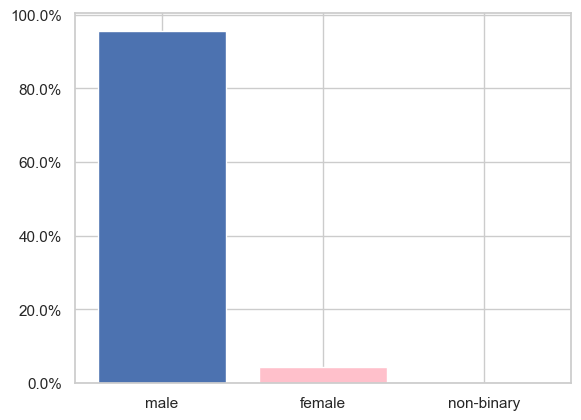

In [362]:
#percentuale maschi,femmine e non binari
plt.bar(age.index,age,color=['b','pink','orange'])
def percent_formatter(x, pos):
    return f'{x}%'

y_format = FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_format)

In [369]:
# Estrai gli anni dalla colonna 'date'
# Calcola il numero di reati commessi per ciascun anno
anni = shot['date'].dt.year
reati_per_anno = anni.value_counts()
reati_per_anno

date
2022    1096
2021    1048
2020    1019
2019     997
2015     995
2018     992
2017     983
2016     958
2023     687
Name: count, dtype: int64

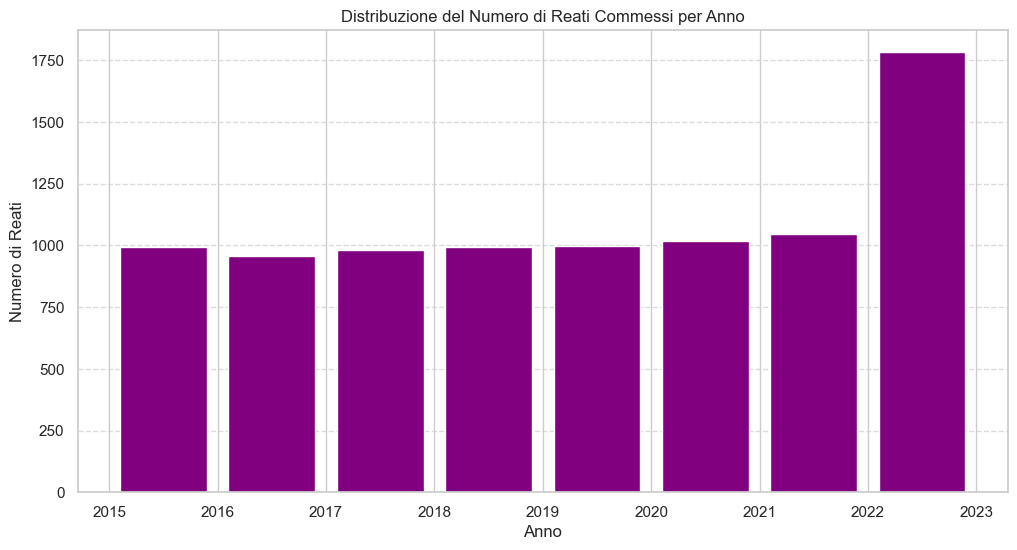

In [370]:
# Crea unshot['date'] istogramma
plt.figure(figsize=(12, 6))
plt.hist(anni, bins=range(min(anni), max(anni) + 1), rwidth=0.8, color='purple', alpha=1.0)
plt.title('Distribuzione del Numero di Reati Commessi per Anno')
plt.xlabel('Anno')
plt.ylabel('Numero di Reati')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

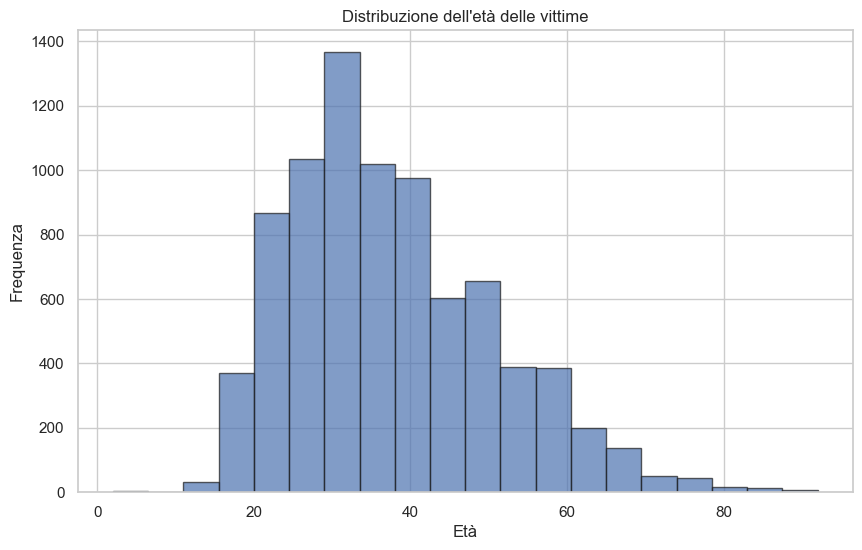

In [374]:
# Crea un istogramma dell'età delle vittime
plt.figure(figsize=(10, 6))
plt.hist(shot[shot['age'].notnull()].age, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribuzione dell\'età delle vittime')
plt.xlabel('Età')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()

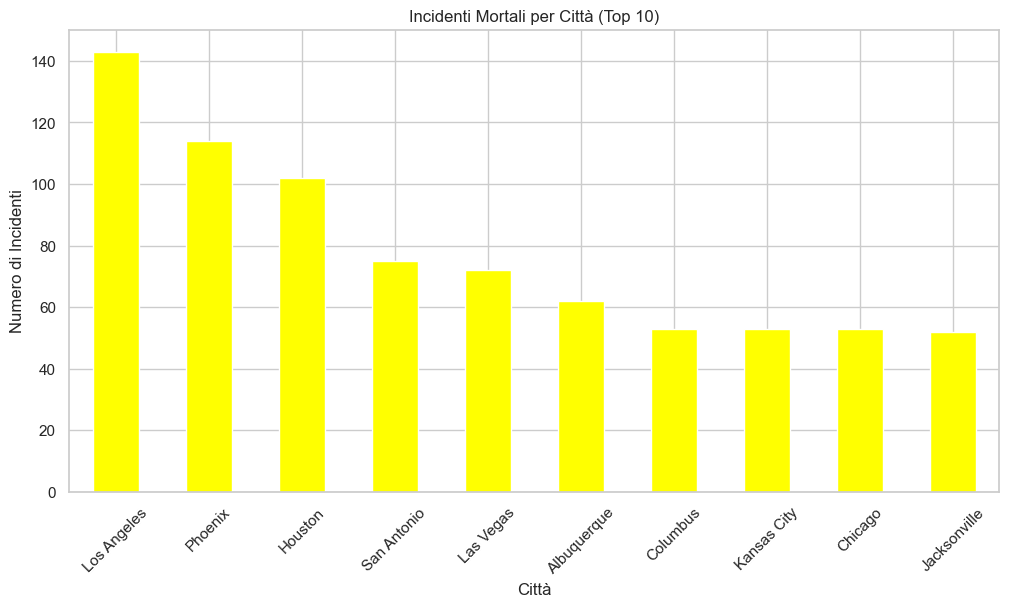

In [7]:
# Calcola la frequenza delle diverse città
frequenza_città = shot['city'].value_counts()

# Stampa il risultato (potrebbe essere lungo)
frequenza_città
# Calcola la frequenza delle diverse città e seleziona le prime 10 più frequenti
frequenza_città = shot['city'].value_counts().head(10)

# Crea un grafico a barre
plt.figure(figsize=(12, 6))
frequenza_città.plot(kind='bar', color='yellow')
plt.title('Incidenti Mortali per Città (Top 10)')
plt.xlabel('Città')
plt.ylabel('Numero di Incidenti')
plt.xticks(rotation=45)
plt.show()

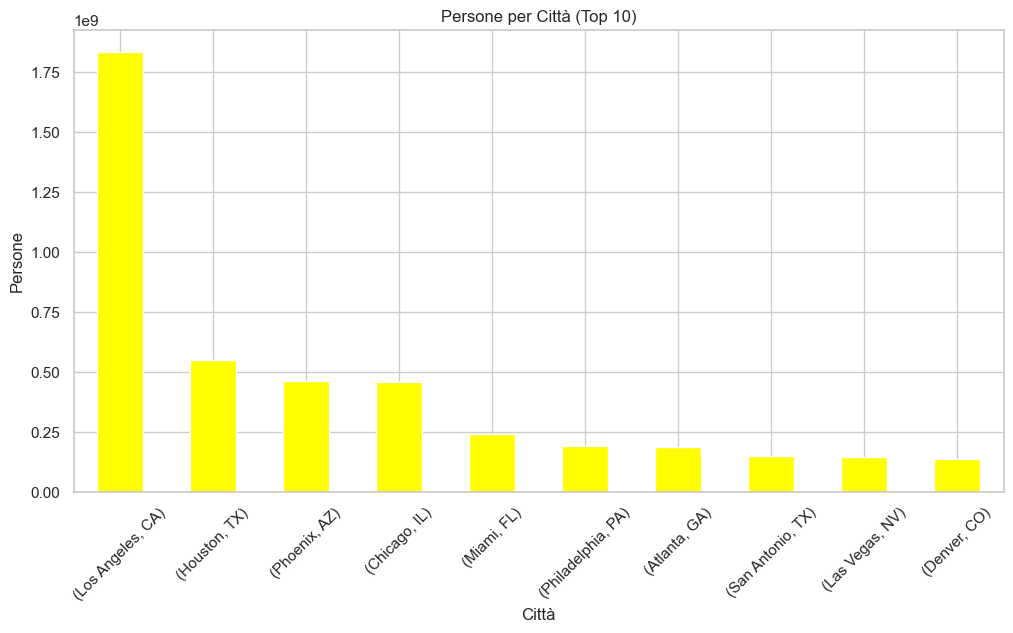

In [104]:
plt.figure(figsize=(12, 6))
union.groupby(by=['city','state'])['population'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='yellow')
plt.title('Persone per Città (Top 10)')
plt.xlabel('Città')
plt.ylabel('Persone')
plt.xticks(rotation=45)
plt.show()

In [101]:
union.groupby(by=['city','state'])['population'].sum()

city          state
Abbeville     AL         2567.0
Aberdeen      NC         7625.0
              WA        29089.0
Abilene       TX       459856.0
Abingdon      VA         7981.0
                         ...   
Yucca Valley  CA        75027.0
Yulee         FL        36732.0
Yuma          AZ       694010.0
Zanesville    OH        41969.0
Zion          IL        71856.0
Name: population, Length: 2237, dtype: float64

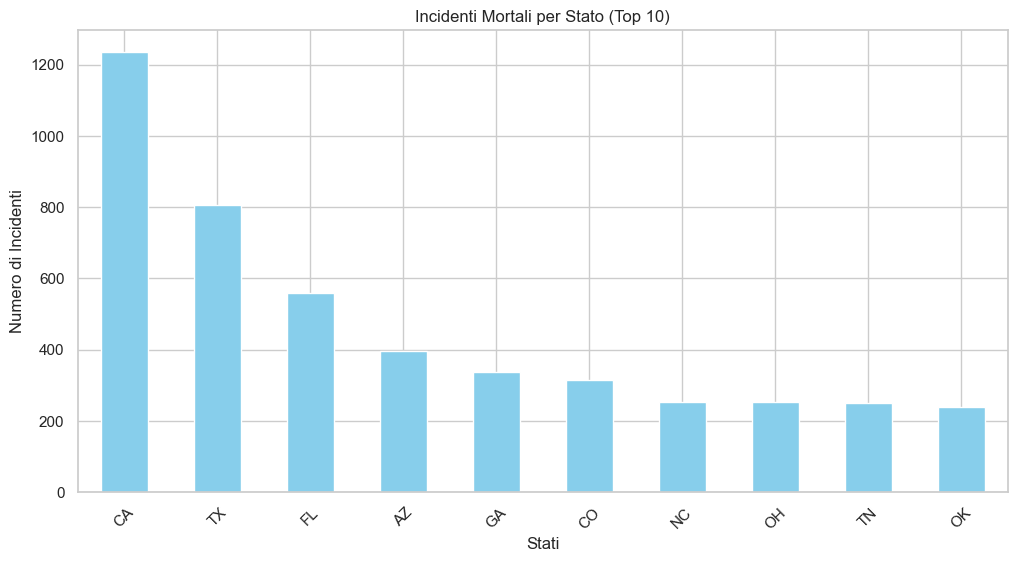

In [6]:
# Calcola la frequenza delle diverse città
frequenza_stato = shot['state'].value_counts()

# Stampa il risultato (potrebbe essere lungo)
frequenza_stato
# Calcola la frequenza delle diverse città e seleziona le prime 10 più frequenti
frequenza_stato = shot['state'].value_counts().head(10)

# Crea un grafico a barre
plt.figure(figsize=(12, 6))
frequenza_stato.plot(kind='bar', color='skyblue')
plt.title('Incidenti Mortali per Stato (Top 10)')
plt.xlabel('Stati')
plt.ylabel('Numero di Incidenti')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

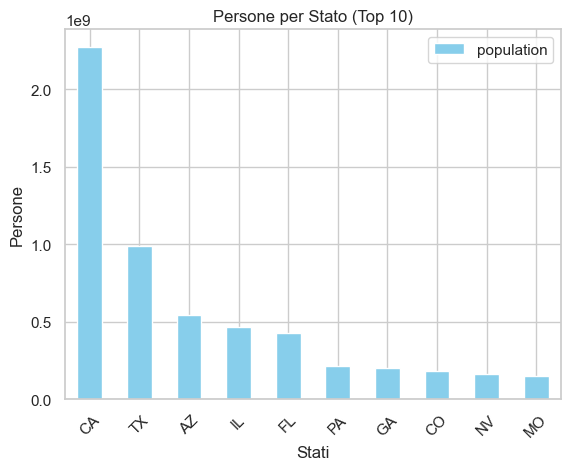

In [105]:
plt.figure(figsize=(12, 6))
union.groupby(by=['state'])[['population']].sum().sort_values(by='population',ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Persone per Stato (Top 10)')
plt.xlabel('Stati')
plt.ylabel('Persone')
plt.xticks(rotation=45)
plt.show()

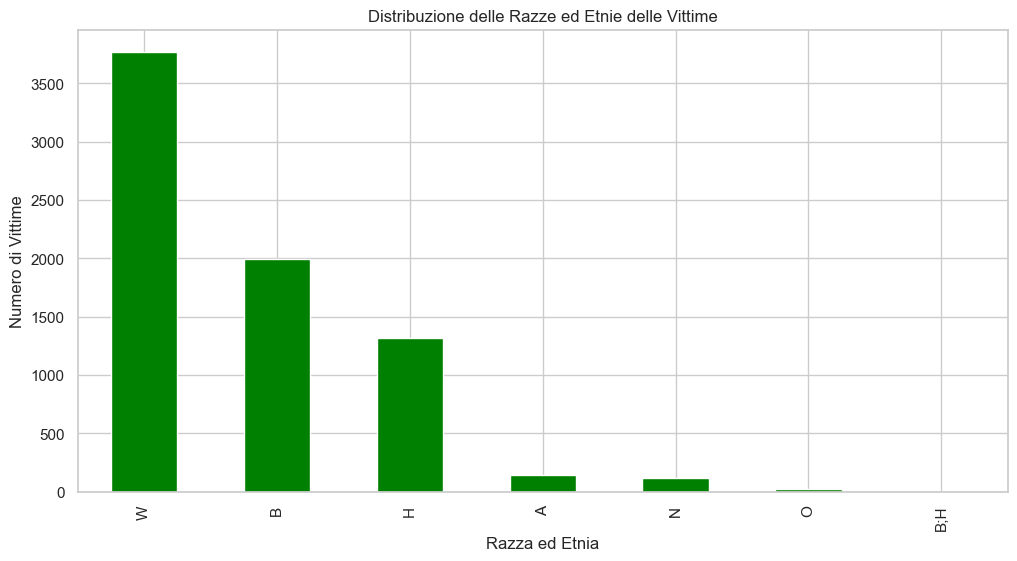

In [118]:
# Calcola la frequenza delle diverse razze ed etnie delle vittime
frequenza_razze = shot['race'].value_counts()

# Stampa il risultato
frequenza_razze
# Calcola la frequenza delle diverse razze ed etnie delle vittime
frequenza_razze = shot['race'].value_counts()

# Crea un grafico a barre
plt.figure(figsize=(12, 6))
frequenza_razze.plot(kind='bar', color='green')
plt.title('Distribuzione delle Razze ed Etnie delle Vittime')
plt.xlabel('Razza ed Etnia')
plt.ylabel('Numero di Vittime')
plt.xticks()
plt.show()

# ANALISI BIVARIATA SU GENERE,ETA E RAZZA

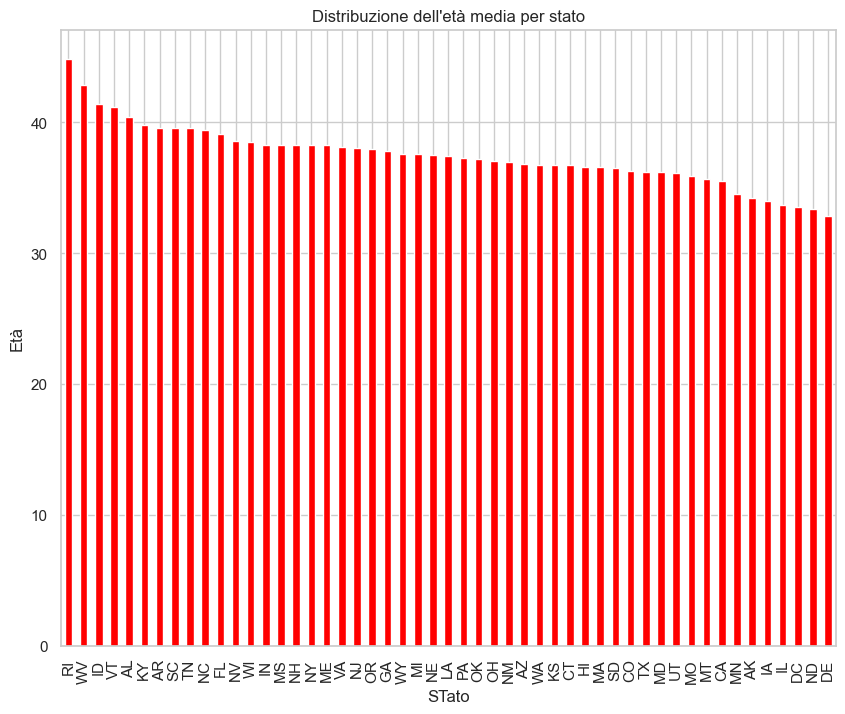

In [460]:
#età media per stato
plt.figure(figsize=(10,8))
shot.groupby(by='state')['age'].mean().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title('Distribuzione dell\'età media per stato')
plt.xlabel('STato')
plt.ylabel('Età')

plt.grid(True)

Text(0, 0.5, 'Età')

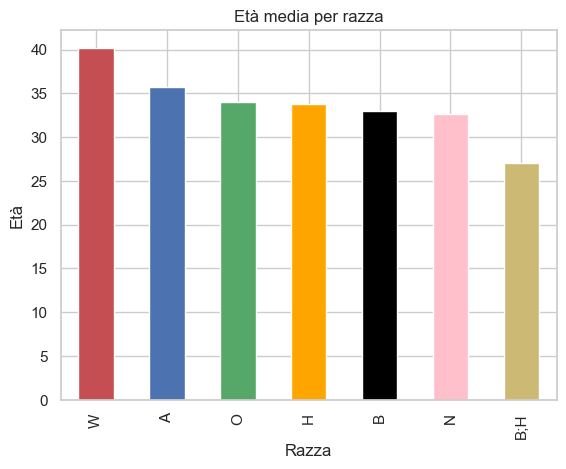

In [459]:
#età media per razza
# W: White
# B: Black
# A: Asian heritage
# N: Native American
# H: Hispanic
# O: Other
# -;- : Unknow
shot.groupby(by='race')['age'].mean().sort_values(ascending=False).plot(kind='bar',color=['r','b','g','orange','black','pink','y'])
plt.title('Età media per razza')
plt.xlabel('Razza')
plt.ylabel('Età')

In [137]:
#percentuale causa di morte dovuta alla minaccia in ogni razza su un totale di 7346 casi conosciuti
causa=pd.DataFrame(shot.threat_type.value_counts().index)
categoria=[]
for x in (shot.race.value_counts().index):
    categoria=[]
    for name in (shot.threat_type.value_counts().index):
        tot=round(shot[(shot['threat_type']==name) & (shot['race']==x)].threat_type.value_counts().sum()/len(shot[(shot['race']==x)&(shot['threat_type'].notnull())])*100,2)
        categoria.append(tot)
    causa[x+str(len(shot[(shot['race']==x)&(shot['threat_type'].notnull())]))]=categoria
causa

,threat_type,W3761,B1989,H1312,A146,N116,O21,B;H1
0,shoot,26.99,32.98,24.54,20.55,18.10,42.86,0.0
1,threat,26.51,22.98,30.64,34.25,31.03,19.05,0.0
2,point,22.63,15.13,15.70,13.01,21.55,0.00,100.0
3,attack,14.17,16.99,16.31,20.55,14.66,23.81,0.0
4,move,4.68,5.23,6.10,6.85,6.03,14.29,0.0
5,undetermined,3.00,3.82,2.97,2.74,6.03,0.00,0.0
6,flee,1.46,2.11,2.74,2.05,2.59,0.00,0.0
7,accident,0.56,0.75,0.99,0.00,0.00,0.00,0.0


In [146]:
len(shot[(shot['race'].notnull())&(shot['threat_type'].notnull())])

7346

In [140]:
#percentuale causa di morte dovuta all' arma in ogni razza su un totale di 7167 casi conosciuti
armi=pd.DataFrame(shot.armed_with.value_counts().index)
categoria=[]
for x in (shot.race.value_counts().index):
    categoria=[]
    for name in (shot.armed_with.value_counts().index):
        tot=round(shot[(shot['armed_with']==name) & (shot['race']==x)].armed_with.value_counts().sum()/len(shot[(shot['race']==x)&(shot['armed_with'].notnull())])*100,2)
        categoria.append(tot)
    armi[x+str(len(shot[(shot['race']==x)&(shot['armed_with'].notnull())]))]=categoria
armi

,armed_with,W3676,B1937,H1275,A141,N116,O21,B;H1
0,gun,60.39,63.60,52.78,43.26,48.28,47.62,100.0
1,knife,16.97,13.63,21.80,30.50,21.55,23.81,0.0
2,unarmed,5.41,8.26,7.37,5.67,6.90,23.81,0.0
3,undetermined,3.45,3.15,3.37,0.71,10.34,0.00,0.0
4,vehicle,3.59,3.67,3.53,4.26,2.59,0.00,0.0
5,replica,4.16,2.84,3.14,3.55,3.45,0.00,0.0
6,blunt_object,2.34,1.70,4.24,3.55,1.72,0.00,0.0
7,unknown,1.52,0.93,1.25,3.55,4.31,4.76,0.0
8,other,0.98,1.03,1.25,2.13,0.86,0.00,0.0
9,gun;vehicle,0.46,0.46,0.39,0.71,0.00,0.00,0.0


In [147]:
len(shot[(shot['race'].notnull())&(shot['armed_with'].notnull())])

7167

In [12]:
# percentuale stato mentale di 7366  casi conosciuti
mentale=pd.DataFrame(shot.was_mental_illness_related.value_counts().index)
categoria=[]
for x in (shot.race.value_counts().index):
    categoria=[]
    for name in (shot.was_mental_illness_related.value_counts().index):
        tot=round(shot[(shot['was_mental_illness_related']==name) & (shot['race']==x)].was_mental_illness_related.value_counts().sum()/len(shot[shot['race']==x])*100,2)
        categoria.append(tot)
    mentale[x+str(len(shot[shot['race']==x]))]=categoria
mentale

,was_mental_illness_related,W3772,B1994,H1315,A146,N117,O21,B;H1
0,False,73.38,84.95,83.95,77.4,84.62,71.43,100.0
1,True,26.62,15.05,16.05,22.6,15.38,28.57,0.0


# STUDIO DEL FILE PD.MERGE CON LE POPOLAZIONI

In [108]:
elementi_unici2 = shot[['state','city','race']]
elementi_unici2=elementi_unici2[elementi_unici2['race'].notnull()]
elementi_unici2=elementi_unici2[elementi_unici2['city'].notnull()].reset_index().drop(columns='index')
elementi_unici2

,state,city,race
0,WA,Shelton,A
1,OR,Aloha,W
2,KS,Wichita,H
3,CA,San Francisco,W
4,CO,Evans,H
...,...,...,...
7331,TN,Knoxville,W
7332,GA,Jonesboro,W
7333,PA,Philadelphia,B
7334,TN,Antioch,W


In [109]:
razze_città=pd.DataFrame(elementi_unici2[['city','state']].drop_duplicates())
razze_città

,city,state
0,Shelton,WA
1,Aloha,OR
2,Wichita,KS
3,San Francisco,CA
4,Evans,CO
...,...,...
7311,Popular Bluff,MO
7314,Osceola,AR
7322,Blendon Township,OH
7328,Woodville,TX


In [110]:
#suddivisione del numero di percentuale delle razze morte per città e Stato su 7366 casi
for i in (elementi_unici2.race.value_counts().index):
    categorie=[]
    for x in range(0,len(razze_città)):
        tot=elementi_unici2[(elementi_unici2['city']==razze_città.iloc[x,0])&(elementi_unici2['state']==razze_città.iloc[x,1])&(elementi_unici2['race']==i)].race.value_counts().sum()
        categorie.append(tot)
    razze_città[i]=categorie
razze_città

,city,state,W,B,H,A,N,O,B;H
0,Shelton,WA,1,0,0,1,0,0,0
1,Aloha,OR,2,0,0,0,0,0,0
2,Wichita,KS,13,0,3,0,0,0,0
3,San Francisco,CA,6,4,7,3,0,1,0
4,Evans,CO,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7311,Popular Bluff,MO,1,0,0,0,0,0,0
7314,Osceola,AR,0,1,0,0,0,0,0
7322,Blendon Township,OH,0,1,0,0,0,0,0
7328,Woodville,TX,0,1,0,0,0,0,0


In [111]:
#trasformo in percentuale i risultati
for x in range(0,len(razze_città)):
    razze_città.iloc[x,2:9]=razze_città.iloc[x,2:9]/razze_città.iloc[x,2:9].sum()*100

In [112]:
 razze_città

,city,state,W,B,H,A,N,O,B;H
0,Shelton,WA,50.000000,0.000000,0.000000,50.000000,0.0,0.000000,0
1,Aloha,OR,100.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
2,Wichita,KS,81.250000,0.000000,18.750000,0.000000,0.0,0.000000,0
3,San Francisco,CA,28.571429,19.047619,33.333333,14.285714,0.0,4.761905,0
4,Evans,CO,50.000000,0.000000,50.000000,0.000000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...
7311,Popular Bluff,MO,100.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
7314,Osceola,AR,0.000000,100.000000,0.000000,0.000000,0.0,0.000000,0
7322,Blendon Township,OH,0.000000,100.000000,0.000000,0.000000,0.0,0.000000,0
7328,Woodville,TX,0.000000,100.000000,0.000000,0.000000,0.0,0.000000,0


In [113]:
#suddivisione della percentuale di persone di razza per stato e città
pop_città = union[['state', 'city','share_white','share_black','share_native_american','share_asian','share_hispanic']]
pop_città=pop_città.drop_duplicates(['city','state'])
pop_città

,state,city,share_white,share_black,share_native_american,share_asian,share_hispanic
7008,WA,Shelton,78.9,0.8,3.7,1.1,19.2
5386,OR,Aloha,70.9,2.6,1.0,8.9,21.1
3254,KS,Wichita,71.9,11.5,1.2,4.8,15.3
1547,CA,San Francisco,48.5,6.1,0.5,33.3,15.1
1912,CO,Evans,76.5,0.9,1.2,0.9,43.1
...,...,...,...,...,...,...,...
4387,NC,Mooresville,80.2,10.9,0.5,3.3,6.9
4409,NC,Roxboro,44.9,46.8,0.6,0.4,8.7
6882,WA,Bothell,79.7,1.6,0.6,10.2,8.7
5165,OH,Warren,67.7,27.7,0.2,0.4,1.9


In [116]:
#suddivisione della percentuale di persone di razza per stato
pop_stati=pd.DataFrame(pop_città.state.value_counts().index)
for i in range(2,7):
    categorie=[]
    for name in (pop_città.state.value_counts().index):
        tot=round(pop_città[pop_città['state']==name].iloc[:,i].mean(),2)
        categorie.append(tot)
    pop_stati[pop_città.columns[i]]=categorie
pop_stati.sort_values(by='state')

,state,share_white,share_black,share_native_american,share_asian,share_hispanic
38,AK,67.83,1.69,20.66,2.25,3.87
9,AL,67.31,28.03,0.47,1.08,3.24
18,AR,75.28,16.83,0.77,1.16,6.71
10,AZ,75.13,2.79,6.35,1.72,27.78
0,CA,60.91,5.15,1.19,10.21,39.26
14,CO,83.10,2.12,1.29,2.11,23.84
39,CT,66.78,15.35,0.45,3.91,21.99
42,DE,62.22,29.03,0.32,1.83,8.33
2,FL,73.06,18.19,0.41,1.89,16.53
3,GA,52.95,36.43,0.32,2.48,10.57


In [117]:
#suddivisione del numero di percentuale delle razze morte per stato su 7366 casi
razze_stato=pd.DataFrame(shot.state.value_counts().index)
categoria=[]
for i in (shot.race.value_counts().index):
    categoria=[]
    for name in (shot.state.value_counts().index):
        tot=round(shot[(shot['state']==name) & (shot['race']==i)].race.value_counts().sum()/len(shot[(shot['state']==name)&(shot['race'].notnull())])*100,2)
        categoria.append(tot)
    razze_stato[i+str(len(shot[(shot['race']==i)&(shot['state'].notnull())]))]=categoria
razze_stato.sort_values(by='state')

,state,W3772,B1994,H1315,A146,N117,O21,B;H1
37,AK,64.58,6.25,0.00,4.17,25.00,0.00,0.00
16,AL,65.00,32.14,2.86,0.00,0.00,0.00,0.00
26,AR,66.34,31.68,0.00,1.98,0.00,0.00,0.00
3,AZ,47.94,10.48,36.51,0.00,5.08,0.00,0.00
0,CA,30.04,17.90,46.50,4.22,0.51,0.82,0.00
5,CO,57.96,10.20,27.76,2.04,2.04,0.00,0.00
45,CT,45.45,22.73,31.82,0.00,0.00,0.00,0.00
44,DC,8.00,92.00,0.00,0.00,0.00,0.00,0.00
47,DE,43.75,50.00,6.25,0.00,0.00,0.00,0.00
2,FL,51.02,33.74,14.02,0.41,0.00,0.81,0.00


In [169]:
len(shot[(shot['race'].notnull())&(shot['state'].notnull())])

7366